# Partie 0 : Traitement des données et libraries

In [204]:
import pandas as pd
import geopandas as gpd
import numpy as np
#import edatk as eda
import math
from matplotlib import pyplot as plt
#from pandas_profiling import ProfileReport
import datetime as dt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import sys
import warnings
from  matplotlib.colors import LinearSegmentedColormap
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [205]:
#https://data.education.gouv.fr/explore/dataset/fr-en-dnb-par-etablissement/information/?disjunctive.session&disjunctive.numero_d_etablissement&disjunctive.denomination_principale&disjunctive.secteur_d_enseignement&disjunctive.commune_et_arrondissement&disjunctive.commune_et_arrondissement_lib_l&disjunctive.departement&disjunctive.departement_libelle&disjunctive.academie&disjunctive.academie_libelle&disjunctive.region&disjunctive.region_libelle
df_brevet=pd.read_csv("fr-en-dnb-par-etablissement.csv",  encoding='utf-8-sig', sep=';',na_values=["-"])

In [206]:
#Traiter les données pour transformer en valeur flotante
df_brevet['taux_de_reussite']=df_brevet['taux_de_reussite'].replace('[\%,]', '', regex=True).astype(float)/100

In [207]:
#Convertir automatiquement les données 
df_brevet.convert_dtypes(infer_objects=True, convert_string=True,
      convert_integer=True, convert_boolean=True, convert_floating=True)

session numero_d_etablissement denomination_principale  \
0          2007               0240106K                 COLLEGE   
1          2007               0240158S                 COLLEGE   
2          2007               0240650B                 COLLEGE   
3          2007               0241033T     LYCEE PROFESSIONNEL   
4          2007               0241042C                 COLLEGE   
...         ...                    ...                     ...   
130759     2015               0300039E                 COLLEGE   
130760     2015               0300050S                 COLLEGE   
130761     2015               0300922P                 COLLEGE   
130762     2015               0300949U                 COLLEGE   
130763     2015               0301094B                 COLLEGE   

              patronyme secteur_d_enseignement commune_et_arrondissement  \
0                  <NA>                 PUBLIC                     24568   
1           JEAN MONNET                 PUBLIC                     24223   
2        ARTHUR RIMBAUD                 PUBLIC                     24372   
3            LE CLUZEAU                  PRIVE                     24534   
4       BERTRAN DE BORN                 PUBLIC                     24322   
...                 ...                    ...                       ...   
130759  DE LA GALABERTE                 PUBLIC                     30263   
130760             <NA>                 PUBLIC                     30344   
130761          TAISSON                  PRIVE                     30007   
130762      JEAN RACINE                 PUBLIC                     30007   
130763          DIDEROT                 PUBLIC                     30189   

       commune_et_arrondissement_lib_l departement departement_libelle  \
0                              VELINES         024            DORDOGNE   
1                              LALINDE         024            DORDOGNE   
2                         SAINT-ASTIER         024            DORDOGNE   
3                 SIGOULES-ET-FLAUGEAC         024            DORDOGNE   
4                            PERIGUEUX         024            DORDOGNE   
...                                ...         ...                 ...   
130759         SAINT-HIPPOLYTE-DU-FORT         030                GARD   
130760                         VERGEZE         030                GARD   
130761                            ALES         030                GARD   
130762                            ALES         030                GARD   
130763                           NIMES         030                GARD   

        academie  ... region      region_libelle nombre_d_inscrits  \
0              4  ...     15  NOUVELLE-AQUITAINE                47   
1              4  ...     15  NOUVELLE-AQUITAINE                85   
2              4  ...     15  NOUVELLE-AQUITAINE               109   
3              4  ...     15  NOUVELLE-AQUITAINE                39   
4              4  ...     15  NOUVELLE-AQUITAINE               122   
...          ...  ...    ...                 ...               ...   
130759        11  ...     16           OCCITANIE                69   
130760        11  ...     16           OCCITANIE               151   
130761        11  ...     16           OCCITANIE               109   
130762        11  ...     16           OCCITANIE               120   
130763        11  ...     16           OCCITANIE                70   

        nombre_de_presents  nombre_total_d_admis  nombre_d_admis_sans_mention  \
0                       46                    41                           21   
1                       84                    70                           37   
2                      108                   105                           52   
3                       39                    38                           13   
4                      121                   106                           34   
...                    ...                   ...                          ...   
13075

In [208]:
#Convertir manuellement les donnees en datetime et object
df_brevet['session']=pd.to_datetime(df_brevet['session'], format= '%Y')
df_brevet['academie']=df_brevet['academie'].astype(str)
df_brevet['region']=df_brevet['region'].astype(str)
df_brevet['session'] = pd.DatetimeIndex(df_brevet['session']).year

In [209]:
#Sélectionner les départements de la petite couronne
df1_brevet=df_brevet[df_brevet['departement'].isin(['075','092','093','094'])]

In [210]:
df1_brevet['academie_libelle'].unique()

array(['PARIS', 'VERSAILLES', 'CRETEIL'], dtype=object)

In [211]:
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)

# Partie 3. Analyse des indecateurs dans le temps

## 3.1 Analyse du taux de réussite au Brevet 

### 3.1.1 Par département

<AxesSubplot:xlabel='session', ylabel='departement_libelle'>

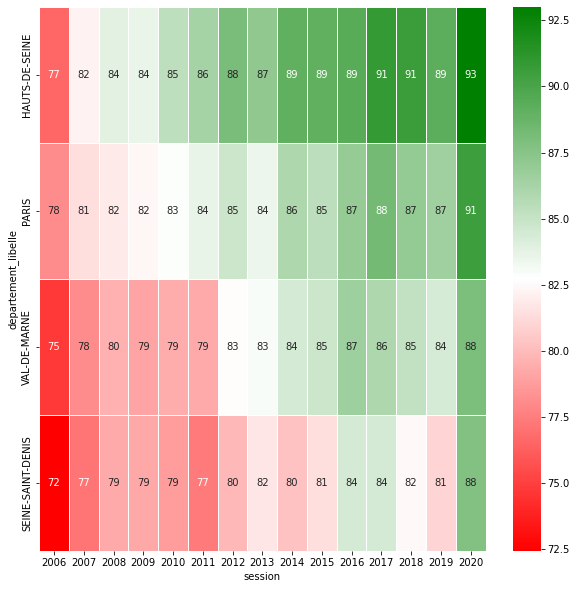

In [111]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(pd.crosstab(df1_brevet['departement_libelle'], df1_brevet['session'], values=df1_brevet['taux_de_reussite'],aggfunc='mean').round(2).sort_values(by=[2020], ascending=False), annot=True, cmap=cmap, linewidths=.5, ax=ax)

On voit qu'il y a eu une augmentation soutenue du taux de reussite au brevet depuis 2006.
Dépassant 90% l'année 2020 dans le cas de Paris et des Hautes-de-Seine.

### 3.1.2 Par commune

<AxesSubplot:xlabel='session', ylabel='commune_et_arrondissement_lib_l'>

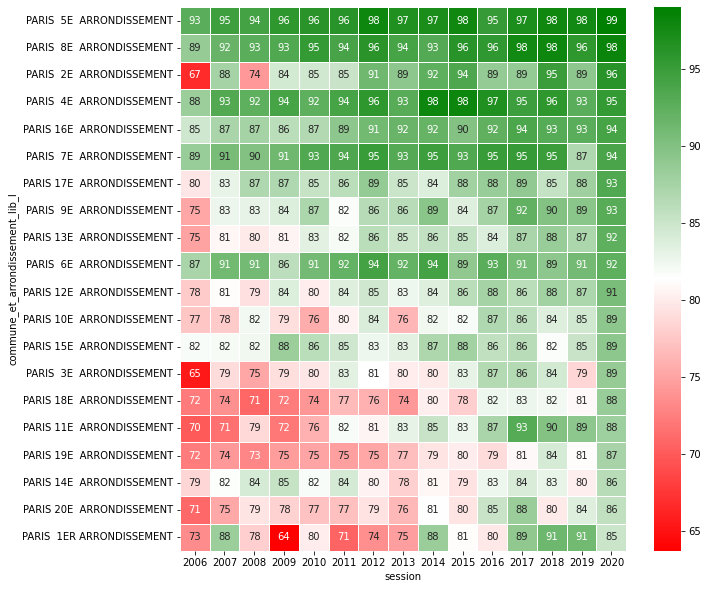

In [11]:
fig, ax = plt.subplots(figsize=(10,10))   
df2_brevet=df1_brevet[df1_brevet['academie_libelle']=='PARIS']
sns.heatmap(pd.crosstab(df2_brevet['commune_et_arrondissement_lib_l'], df2_brevet['session'], values=df2_brevet['taux_de_reussite'],aggfunc='mean').round(2).sort_values(by=[2020], ascending=False), annot=True, cmap=cmap, linewidths=.5, ax=ax)

Si on regarde par les arrondissement à Paris on constate aussi une augmentation soutenue. Les districts avec les taux de réussite les plus élevés sont 5ème, 8ème, 4ème et 16ème. Également 2ème avec une croissance légèrement erratique. Autre remarque, la situation avec le 6ème qui a longtemps eu de très bons résultats, mais l'année dérnière il n'était pas dans le top 5.

<AxesSubplot:xlabel='session', ylabel='commune_et_arrondissement_lib_l'>

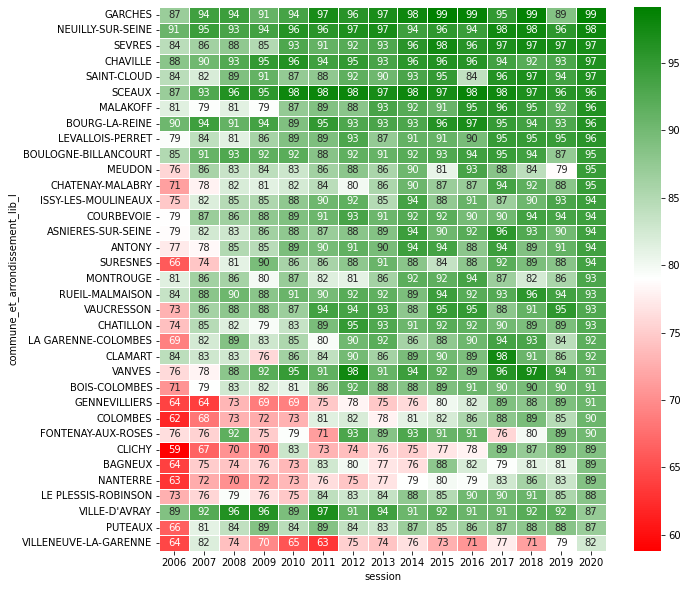

In [12]:
fig, ax = plt.subplots(figsize=(10,10))   
df2_brevet=df1_brevet[df1_brevet['academie_libelle']=='VERSAILLES']
sns.heatmap(pd.crosstab(df2_brevet['commune_et_arrondissement_lib_l'], df2_brevet['session'], values=df2_brevet['taux_de_reussite'],aggfunc='mean').round(2).sort_values(by=[2020], ascending=False), annot=True, cmap=cmap, linewidths=.5, ax=ax)

<AxesSubplot:xlabel='session', ylabel='commune_et_arrondissement_lib_l'>

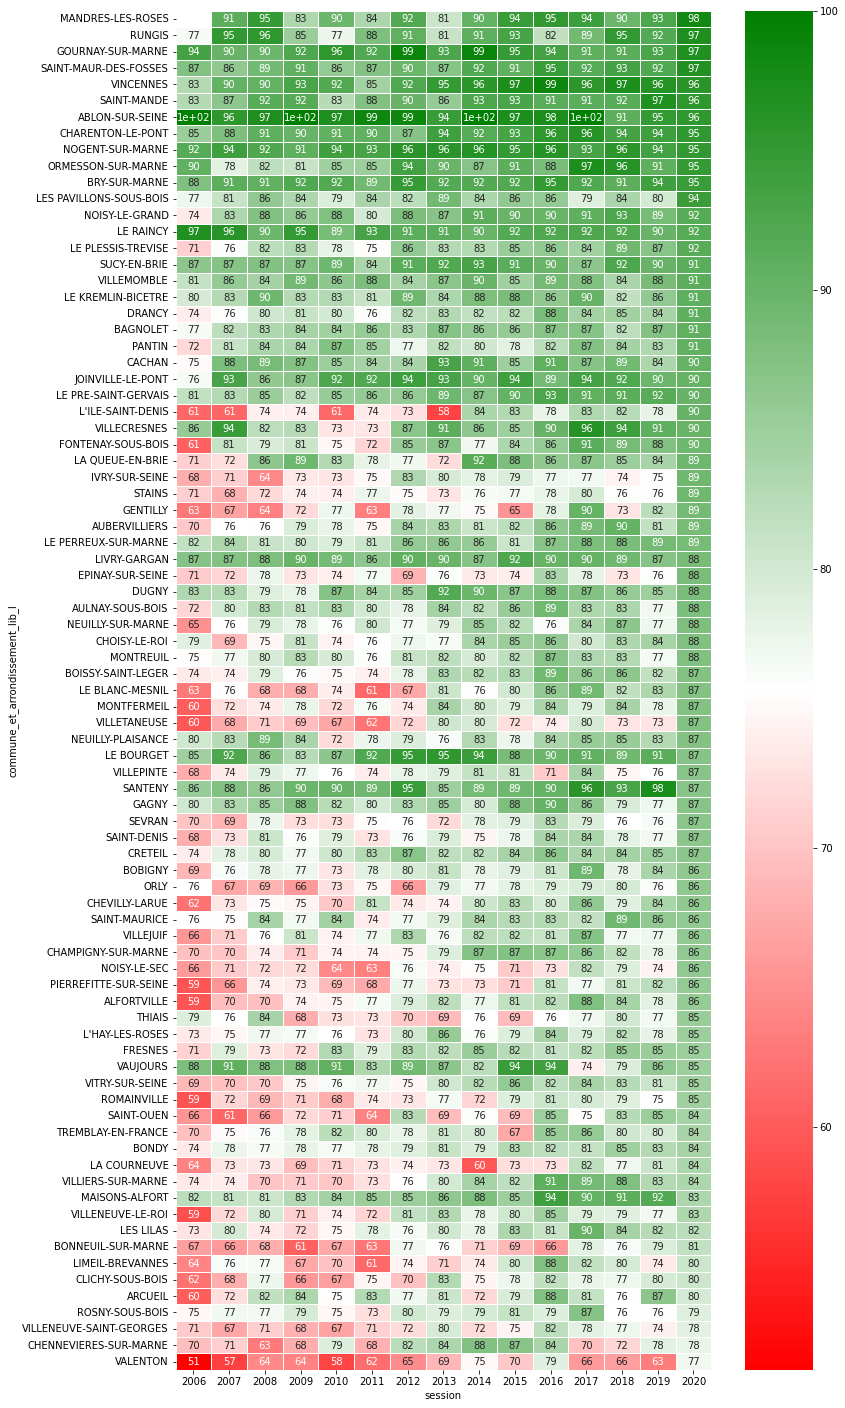

In [13]:
fig, ax = plt.subplots(figsize=(12,25)) 
df2_brevet=df1_brevet[df1_brevet['academie_libelle']=='CRETEIL']
sns.heatmap(pd.crosstab(df2_brevet['commune_et_arrondissement_lib_l'], df2_brevet['session'], values=df2_brevet['taux_de_reussite'],aggfunc='mean').round(2).sort_values(by=[2020], ascending=False), annot=True, cmap=cmap, linewidths=.5, ax=ax)

Les cartes thermiques montrent également une disparité entre les différentes communes, mais nous avons une granularité plus marquée, nous n'avons donc pas pu avoir un résultat aussi concluant.

### 3.1.3 Par type de institution

In [14]:
pd.concat([pd.crosstab(df1_brevet['session'],df1_brevet['secteur_d_enseignement'], normalize='index').rename(columns={'PRIVE': 'Part_PRIVE', 'PUBLIC': 'Part_Public'}),
           pd.crosstab(df1_brevet['session'],df1_brevet['secteur_d_enseignement'], values=df1_brevet['taux_de_reussite'],aggfunc=['mean','std'])], axis=1).round(2)

Part_PRIVE  Part_Public  (mean, PRIVE)  (mean, PUBLIC)  (std, PRIVE)  \
session                                                                         
2006           0.27         0.73          90.66           70.12         11.48   
2007           0.27         0.73          92.89           75.02         12.46   
2008           0.27         0.73          93.80           76.59          9.69   
2009           0.26         0.74          92.55           77.10         12.56   
2010           0.26         0.74          94.81           77.05          9.67   
2011           0.26         0.74          94.24           77.39          9.53   
2012           0.26         0.74          95.14           79.94         10.87   
2013           0.25         0.75          94.82           80.08         10.35   
2014           0.25         0.75          96.01           81.22          8.10   
2015           0.25         0.75          94.67           81.85         11.98   
2016           0.25         0.75          96.56           83.55          7.26   
2017           0.24         0.76          93.97           85.25         10.25   
2018           0.24         0.76          94.42           83.60         11.38   
2019           0.25         0.75          94.33           82.27         10.51   
2020           0.25         0.75          96.69           87.55          6.75   

         (std, PUBLIC)  
session                 
2006             11.86  
2007             11.17  
2008             10.96  
2009             10.82  
2010             10.78  
2011             10.85  
2012             10.43  
2013             10.88  
2014             11.12  
2015             10.10  
2016              9.54  
2017              9.77  
2018             10.02  
2019             10.32  
2020              7.70

In [15]:
fig = px.line(df1_brevet.groupby(['session','departement_libelle','secteur_d_enseignement'])['taux_de_reussite'].mean().reset_index(), x="session", y="taux_de_reussite", color="departement_libelle",facet_row="secteur_d_enseignement", title='Taux_de_reussite', width=1000, height=700)
fig.update_layout(legend =dict(font = dict(family = "Courier", size = 10, color = "black")),
                  legend_title = dict(font = dict(size = 20, color = "blue")))
fig.show()

Comme on pourrait s'atteindre, la différence de taux de réussite entre les départements est plus évidente dans les institutions publiques. L'enseignement privé, en général, maintient un niveau d'éducation plus élevées, quel que soit le département où ils se trouvent.

## 3.2 Analyse du taux de réussite au BAC

In [16]:
# Base de données pour l'analyse de BAC
df_bac=pd.read_csv('fr-en-indicateurs-de-resultat-des-lycees-denseignement-general-et-technologique.csv',   encoding='utf-8-sig', sep=';')

In [18]:
#Convertir automatiquement les données 
df_bac.convert_dtypes(infer_objects=True, convert_string=True,
      convert_integer=True, convert_boolean=True, convert_floating=True)

Etablissement  Annee  \
0                                        LYCEE LALANDE   2019   
1      LYCEE JOSEPH-MARIE CARRIAT (GENERAL ET TECHNO.)   2019   
2             LYCEE INTERNATIONAL (GENERAL ET TECHNO.)   2019   
3                                   LYCEE JEANNE D'ARC   2019   
4                                  LYCEE LA PROVIDENCE   2019   
...                                                ...    ...   
20838           LYCEE DE VINCENDO (GENERAL ET TECHNO.)   2020   
20839        LYCEE GUSTAVE EIFFEL (GENERAL ET TECHNO.)   2020   
20840               LYCEE DE SADA (GENERAL ET TECHNO.)   2020   
20841            LYCEE DE DEMBENI (GENERAL ET TECHNO.)   2020   
20842     LYCEE DE MAMOUDZOU NORD (GENERAL ET TECHNO.)   2020   

                 Ville       UAI Code commune    Academie  Departement  \
0      BOURG EN BRESSE  0010013J         1053        LYON          Ain   
1      BOURG EN BRESSE  0010016M         1053        LYON          Ain   
2      FERNEY VOLTAIRE  0010072Y         1160        LYON          Ain   
3                CESSY  0010878Z         1071        LYON          Ain   
4                 LAON  0021872Z         2408      AMIENS        Aisne   
...                ...       ...          ...         ...          ...   
20838        ST JOSEPH  9741230U        97412  LA REUNION  La R√©union   
20839         OUANGANI  9760125G        97614     MAYOTTE      Mayotte   
20840             SADA  9760182U        97616     MAYOTTE      Mayotte   
20841          DEMBENI  9760338N        97607     MAYOTTE      Mayotte   
20842        MAMOUDZOU  9760370Y        97611     MAYOTTE      Mayotte   

      Secteur  Presents - L  Presents - ES  ...  \
0          PU            54             78  ...   
1          PU          <NA>             51  ...   
2          PU            42            200  ...   
3          PR            19             39  ...   
4          PR             3             18  ...   
...       ...           ...            ...  ...   
20838      PU            20             47  ...   
20839      PU            33             34  ...   
20840      PU            70             98  ...   
20841      PU            70             68  ...   
20842      PU           103             72  ...   

       Valeur ajoutee du taux de mentions - L  \
0                                          -3   
1                                        <NA>   
2                                          -2   
3                                          -5   
4                                          ND   
...                                       ...   
20838                                      -5   
20839                                      ND   
20840                                      ND   
20841                                      ND   
20842                                      ND   

       Valeur ajoutee du taux de mentions - ES  \
0                                            4   
1                                          -14   
2                                           -7   
3                                          -15   
4                                          -29   
...                                        ...   
20838                                       17   
20839                                       ND   
20840                                       ND   
20841                                       ND   
20842                                       ND   

       Valeur ajoutee du taux de mentions - S  \
0                                          -2   
1                                           0   
2                                          -8   
3                                          15   
4                                         -40   
...                                       ...   
20838                                      12   
20839                                      ND   
20840                                      ND   
20841                                      ND   
20842                        

In [112]:
df1=df_bac.loc[df_bac['Academie'] == 'PARIS']


In [113]:
df_bac['total_eleves_general']=df_bac['Presents - L']+df_bac['Presents - ES']+df_bac['Presents - S']
df_bac['Taux_reussite_general']=(df_bac['Presents - L']*df_bac['Taux de reussite - L']+df_bac['Presents - S']*df_bac['Taux de reussite - S']+df_bac['Presents - ES']*df_bac['Taux de reussite - ES'])/df_bac['total_eleves_general']
df_bac['Taux_mentions_general']=(df_bac['Presents - L']*df_bac['Taux de mentions - L']+df_bac['Presents - S']*df_bac['Taux de mentions - S']+df_bac['Presents - ES']*df_bac['Taux de mentions - ES'])/df_bac['total_eleves_general']

df_ayuda=df_bac[[
 'Presents - STG',
 'Presents - STI2D',
 'Presents - STD2A',
 'Presents - STMG',
 'Presents - STI',
 'Presents - STL',
 'Presents - ST2S',
 'Presents - TMD',
 'Presents - STHR',
 'Taux de reussite - STG',
 'Taux de reussite - STI2D',
 'Taux de reussite - STD2A',
 'Taux de reussite - STMG',
 'Taux de reussite - STI',
 'Taux de reussite - STL',
 'Taux de reussite - ST2S',
 'Taux de reussite - TMD',
 'Taux de reussite - STHR',
 'Taux de mentions - STI2D',
 'Taux de mentions - STD2A',
 'Taux de mentions - STMG',
 'Taux de mentions - STL',
 'Taux de mentions - ST2S',
 'Taux de mentions - TMD',
 'Taux de mentions - STHR']]  
df_ayuda=df_ayuda.fillna(0)

df_bac['total_eleves_technique']=df_ayuda['Presents - STG']+df_ayuda['Presents - STI2D']+df_ayuda['Presents - STD2A']+df_ayuda['Presents - STMG']+df_ayuda['Presents - STI']+df_ayuda['Presents - STL']+df_ayuda['Presents - ST2S']+df_ayuda['Presents - TMD']+df_ayuda['Presents - STHR']
df_bac['Taux_reussite_technique']= (df_ayuda['Presents - STG']*df_ayuda['Taux de reussite - STG']+ df_ayuda['Presents - STI2D']*df_ayuda['Taux de reussite - STI2D']+df_ayuda['Presents - STD2A']*df_ayuda['Taux de reussite - STD2A']+df_ayuda['Presents - STMG']*df_ayuda['Taux de reussite - STMG']+df_ayuda['Presents - STI']*df_ayuda['Taux de reussite - STI']+df_ayuda['Presents - STL']*df_ayuda['Taux de reussite - STL']+df_ayuda['Presents - ST2S']*df_ayuda['Taux de reussite - ST2S']+df_ayuda['Presents - TMD']*df_ayuda['Taux de reussite - TMD']+df_ayuda['Presents - STHR']*df_ayuda['Taux de reussite - STHR'])/df_bac['total_eleves_technique']
df_bac['Taux_mentions_technique']= (df_ayuda['Presents - STI2D']*df_ayuda['Taux de mentions - STI2D']+df_ayuda['Presents - STD2A']*df_ayuda['Taux de mentions - STD2A']+df_ayuda['Presents - STMG']*df_ayuda['Taux de mentions - STMG']+df_ayuda['Presents - STL']*df_ayuda['Taux de mentions - STL']+df_ayuda['Presents - ST2S']*df_ayuda['Taux de mentions - ST2S']+df_ayuda['Presents - TMD']*df_ayuda['Taux de mentions - TMD']+df_ayuda['Presents - STHR']*df_ayuda['Taux de mentions - STHR'])/(df_bac['total_eleves_technique']-df_ayuda['Presents - STI']-df_ayuda['Presents - STG'])

df_bac['STG']=np.where(df_bac["Presents - STG"]>0, 1,0)
df_bac['STI2D']=np.where(df_bac["Presents - STI2D"]>0, 1,0)
df_bac['STD2A']=np.where(df_bac["Presents - STD2A"]>0, 1,0)
df_bac['STMG']=np.where(df_bac["Presents - STMG"]>0, 1,0)
df_bac['STI']=np.where(df_bac["Presents - STI"]>0, 1,0)
df_bac['STL']=np.where(df_bac["Presents - STL"]>0, 1,0)
df_bac['ST2S']=np.where(df_bac["Presents - ST2S"]>0, 1,0)
df_bac['TMD']=np.where(df_bac["Presents - TMD"]>0, 1,0)
df_bac['STHR']=np.where(df_bac["Presents - STHR"]>0, 1,0)

df_bac['Nombre_section_tecnique']=df_bac['STG']+df_bac['STI2D']+df_bac['STD2A']+df_bac['STMG']+df_bac['STI']+df_bac['STL']+df_bac['ST2S']+df_bac['TMD']+df_bac['STHR']


In [114]:
df1_bac=df_bac[df_bac['Region'].isin(['Ile-de-France']) & df_bac['code_departement'].isin(['75','92','93','94'])]

In [115]:
df1_bac=df1_bac[["Taux_mentions_technique", "Taux_mentions_general","total_eleves_general","total_eleves_technique","Nombre_section_tecnique", "Taux_reussite_general", "Taux_reussite_technique", "Etablissement","Annee","Ville","UAI","Code commune","Academie","Departement","Secteur","Presents - L","Presents - ES","Presents - S","Presents - STG","Presents - STI2D","Presents - STD2A","Presents - STMG","Presents - STI","Presents - STL","Presents - ST2S","Presents - TMD","Presents - STHR","Presents - Toutes series","Taux de reussite - L","Taux de reussite - ES","Taux de reussite - S","Taux de reussite - STG","Taux de reussite - STI2D","Taux de reussite - STD2A","Taux de reussite - STMG","Taux de reussite - STI","Taux de reussite - STL","Taux de reussite - ST2S","Taux de reussite - TMD","Taux de reussite - STHR","Taux de reussite - Toutes series","Taux de reussite attendu france - L","Taux de reussite attendu france - ES","Taux de reussite attendu france - S","Taux de reussite attendu france - STG","Taux de reussite attendu france - STI2D","Taux de reussite attendu france - STD2A","Taux de reussite attendu france - STMG","Taux de reussite attendu france - STI","Taux de reussite attendu france - STL","Taux de reussite attendu france - ST2S","Taux de reussite attendu france - TMD","Taux de reussite attendu france - STHR","Taux de reussite attendu france - Toutes series","Taux de mentions - L","Taux de mentions - ES","Taux de mentions - S","Taux de mentions - STI2D","Taux de mentions - STD2A","Taux de mentions - STMG","Taux de mentions - STL","Taux de mentions - ST2S","Taux de mentions - TMD","Taux de mentions - STHR","Taux de mentions - Toutes series","Taux de mentions attendu - L","Taux de mentions attendu - ES","Taux de mentions attendu - S","Taux de mentions attendu - STI2D","Taux de mentions attendu - STD2A","Taux de mentions attendu - STMG","Taux de mentions attendu - STL","Taux de mentions attendu - ST2S","Taux de mentions attendu - TMD","Taux de mentions attendu - STHR","Taux de mentions attendu - Toutes series","Structure pedagogique 5 groupes","Structure pedagogique 7 groupes","Effectif de seconde","Effectif de premiere","Effectif de terminale","Taux d'acces 2nde-bac","Taux d'acces attendu france 2nde-bac","Taux d'acces 1ere-bac","Taux d'acces attendu france 1ere-bac","Taux d'acces terminale-bac", "Taux d'acces attendu france terminale-bac","Region","Code region","code_departement"]]

In [116]:
#df2=df1[df1['Academie'].isin(['PARIS'])]

In [117]:
df1_bac['Academie'].unique()

array(['PARIS', 'VERSAILLES', 'CRETEIL'], dtype=object)

## BAC général

In [118]:
df2 = df1[['Etablissement','Annee','Ville','Academie','Taux de reussite - L','Taux de reussite - ES','Taux de reussite - S']]

In [124]:
df2.groupby(['Ville']).agg(avg_tx_réussite_L=('Taux de reussite - L','mean'),avg_tx_réussite_ES = ('Taux de reussite - ES', 'mean'),avg_tx_réussite_S = ('Taux de reussite - S', 'mean'))

avg_tx_réussite_L  avg_tx_réussite_ES  avg_tx_réussite_S
Ville                                                             
PARIS 03          94.346154           92.789474          91.833333
PARIS 04          99.250000           98.600000          99.111111
PARIS 05          99.266667           99.527778          99.444444
PARIS 06          98.000000           98.444444          97.444444
PARIS 07          96.500000           98.353846          99.620690
PARIS 08          98.888889           98.185185          98.185185
PARIS 09          90.543478           89.000000          82.456522
PARIS 10          96.083333           95.611111          95.277778
PARIS 11          93.384615           89.410256          90.100000
PARIS 12          95.000000           91.777778          91.795918
PARIS 13          93.250000           93.873016          93.015385
PARIS 14          80.555556           86.629630          82.772727
PARIS 15          90.720000           85.813559          85.783333
PARIS 16          96.933333           97.008547          96.927273
PARIS 17          98.133333           97.187500          96.562500
PARIS 18          87.588235           93.407407          90.703704
PARIS 19          91.869565           93.805556          92.321429
PARIS 20          96.086957           95.148148          93.821429

Au bac économique et social Paris 04e, 05e, 06e le taux de réussite plus haut, Paris 14e 18e 09e le taux de réussite plus bas.
Au bac littérature Paris 05e, 04e, 06e le taux de réussite plus haut, Paris 15e 14e 09e le taux de réussite plus bas.
Au bac scientifique Paris 05e, 04e, 07e le taux de réussite plus haut, Paris 14e 15e 09e le taux de réussite plus bas.
En utilisant ce tableau, nous constatons qu'il y a peu de corrélation entre la haute performance des arrondissments et le changement dans le temps, car les arrondissements qui ont obtenu de bons résultats ont largement excellé de 2012 à 2020, et les arrondissements qui ont obtenu de moins bons résultats ont maintenu cette situation au cours des huit années.

### 3.2.1 Analyse de tx de la petite couronne de Paris

## la première couronne : Hauts de saine (92)

In [125]:
#la première couronne : Hauts de saine (92)
df3=df_bac.loc[df_bac['Departement'] == 'Hauts-de-Seine']
# Etude sur le Bac général
df3a = df3[['Etablissement','Annee','Ville','Departement','Taux de reussite - L','Taux de reussite - ES','Taux de reussite - S']]
df3a.isna().sum()

Etablissement             0
Annee                     0
Ville                     0
Departement               0
Taux de reussite - L     87
Taux de reussite - ES    19
Taux de reussite - S     17
dtype: int64

In [126]:
# taux de réussite par chaque ville de hauts-de-seine par chaque année
df3a.groupby(['Ville','Annee']).agg(avg_tx_réussite_L=('Taux de reussite - L','mean'),avg_tx_réussite_ES = ('Taux de reussite - ES', 'mean'),avg_tx_réussite_S = ('Taux de reussite - S', 'mean'))

avg_tx_réussite_L  avg_tx_réussite_ES  \
Ville                 Annee                                          
ANTONY                2012                96.0                94.5   
                      2013                98.0                96.0   
                      2014                93.0                98.0   
                      2015               100.0                97.5   
                      2016                97.5                95.0   
...                                        ...                 ...   
VILLENEUVE LA GARENNE 2016                72.0                87.0   
                      2017                82.0                86.0   
                      2018                92.0                70.0   
                      2019                69.0                92.0   
                      2020                95.0                91.0   

                             avg_tx_réussite_S  
Ville                 Annee                     
ANTONY                2012                97.0  
                      2013                97.5  
                      2014                97.5  
                      2015                95.5  
                      2016                97.5  
...                                        ...  
VILLENEUVE LA GARENNE 2016                83.0  
                      2017                87.0  
                      2018                87.0  
                      2019                76.0  
                      2020                98.0  

[263 rows x 3 columns]

In [34]:
# Étude sur le Bac général
df3a = df3[['Etablissement','Annee','Ville','Departement','Taux de reussite - L','Taux de reussite - ES','Taux de reussite - S']]

Etablissement  Annee  \
404                              LYCEE AUGUSTE RENOIR   2019   
405                                  LYCEE PAUL LAPIE   2019   
406           LYCEE JOLIOT-CURIE (GENERAL ET TECHNO.)   2019   
407                                 LYCEE MARIE CURIE   2019   
408                                   LYCEE RICHELIEU   2019   
...                                               ...    ...   
20782          LYCEE MONTESQUIEU (GENERAL ET TECHNO.)   2020   
20783       LYCEE GUSTAVE EIFFEL (GENERAL ET TECHNO.)   2020   
20784                              LYCEE LUCIE AUBRAC   2020   
20785  LYCEE LA SALLE ST NICOLAS (GENERAL ET TECHNO.)   2020   
20786                   LYCEE DE BOULOGNE-BILLANCOURT   2020   

                      Ville     Departement  Taux de reussite - L  \
404      ASNIERES SUR SEINE  Hauts-de-Seine                  88.0   
405              COURBEVOIE  Hauts-de-Seine                  81.0   
406                NANTERRE  Hauts-de-Seine                  80.0   
407                  SCEAUX  Hauts-de-Seine                 100.0   
408         RUEIL MALMAISON  Hauts-de-Seine                  94.0   
...                     ...             ...                   ...   
20782   LE PLESSIS ROBINSON  Hauts-de-Seine                  93.0   
20783       RUEIL MALMAISON  Hauts-de-Seine                   NaN   
20784            COURBEVOIE  Hauts-de-Seine                  96.0   
20785   ISSY LES MOULINEAUX  Hauts-de-Seine                   NaN   
20786  BOULOGNE BILLANCOURT  Hauts-de-Seine                   NaN   

       Taux de reussite - ES  Taux de reussite - S  
404                     88.0                  87.0  
405                     86.0                  94.0  
406                     84.0                  74.0  
407                     96.0                  97.0  
408                     83.0                  94.0  
...                      ...                   ...  
20782                  100.0                  92.0  
20783                  100.0                   NaN  
20784                  100.0                 100.0  
20785                  100.0                 100.0  
20786                   91.0                  94.0  

[471 rows x 7 columns]

In [37]:
# taux de réussite par chaque ville de hauts-de-seine par chaque année
df3a.groupby(['Ville','Annee'])['Taux de reussite - L'].agg([('avg_tx_réussite_L',np.mean)])

avg_tx_réussite_L
Ville                 Annee                   
ANTONY                2012                96.0
                      2013                98.0
                      2014                93.0
                      2015               100.0
                      2016                97.5
...                                        ...
VILLENEUVE LA GARENNE 2016                72.0
                      2017                82.0
                      2018                92.0
                      2019                69.0
                      2020                95.0

[263 rows x 1 columns]

In [38]:
df3a.groupby(['Ville','Annee'])['Taux de reussite - ES'].agg([('avg_tx_réussite_ES',np.mean)])

avg_tx_réussite_ES
Ville                 Annee                    
ANTONY                2012                 94.5
                      2013                 96.0
                      2014                 98.0
                      2015                 97.5
                      2016                 95.0
...                                         ...
VILLENEUVE LA GARENNE 2016                 87.0
                      2017                 86.0
                      2018                 70.0
                      2019                 92.0
                      2020                 91.0

[263 rows x 1 columns]

In [39]:
df3a.groupby(['Ville','Annee'])['Taux de reussite - S'].agg([('avg_tx_réussite_S',np.mean)])

avg_tx_réussite_S
Ville                 Annee                   
ANTONY                2012                97.0
                      2013                97.5
                      2014                97.5
                      2015                95.5
                      2016                97.5
...                                        ...
VILLENEUVE LA GARENNE 2016                83.0
                      2017                87.0
                      2018                87.0
                      2019                76.0
                      2020                98.0

[263 rows x 1 columns]

In [41]:
# Le nombre du lycée de chaque ville de hauts-de-seine par chaque année
df3a.groupby(['Ville','Annee'])['Etablissement'].nunique()

Ville                  Annee
ANTONY                 2012     2
                       2013     2
                       2014     2
                       2015     2
                       2016     2
                               ..
VILLENEUVE LA GARENNE  2016     1
                       2017     1
                       2018     1
                       2019     1
                       2020     1
Name: Etablissement, Length: 263, dtype: int64

## La seconde couronne : Seine-Saint-Denis(93)

In [42]:
#la seconde couronne : Seine-Saint-Denis(93)
df4=df_bac.loc[df_bac['Departement'] == 'Seine-Saint-Denis']
df4.head(5)

Etablissement  Annee         Ville  \
414  LYCEE EUGENE DELACROIX (GENERAL ET TECHNO.)   2019        DRANCY   
415                              LYCEE CONDORCET   2019     MONTREUIL   
416      LYCEE JEAN ROSTAND (GENERAL ET TECHNO.)   2019    VILLEPINTE   
417                        LYCEE ANDRE BOULLOCHE   2019  LIVRY GARGAN   
418              LYCEE JEAN-BAPTISTE DE LA SALLE   2019      ST DENIS   

          UAI Code commune Academie        Departement Secteur  Presents - L  \
414  0930119Z        93029  CRETEIL  Seine-Saint-Denis      PU          49.0   
415  0930122C        93048  CRETEIL  Seine-Saint-Denis      PU          23.0   
416  0931584S        93078  CRETEIL  Seine-Saint-Denis      PU          29.0   
417  0931585T        93046  CRETEIL  Seine-Saint-Denis      PU          33.0   
418  0931797Y        93066  CRETEIL  Seine-Saint-Denis      PR           NaN   

     Presents - ES  ...  STG  STI2D  STD2A  STMG  STI  STL  ST2S  TMD  STHR  \
414           95.0  ...    0      0      0     1    0    0     1    0     0   
415            NaN  ...    0      1      0     0    0    0     0    0     0   
416           94.0  ...    0      1      0     1    0    0     0    0     0   
417           91.0  ...    0      0      0     1    0    0     0    0     0   
418           28.0  ...    0      1      0     1    0    0     0    0     0   

     Nombre_section_tecnique  
414                        2  
415                        1  
416                        2  
417                        1  
418                        2  

[5 rows x 148 columns]

In [43]:
# Étude sur le Bac général
df4a = df4[['Etablissement','Annee','Ville','Departement','Taux de reussite - L','Taux de reussite - ES','Taux de reussite - S']]
df4a

Etablissement  Annee  \
414          LYCEE EUGENE DELACROIX (GENERAL ET TECHNO.)   2019   
415                                      LYCEE CONDORCET   2019   
416              LYCEE JEAN ROSTAND (GENERAL ET TECHNO.)   2019   
417                                LYCEE ANDRE BOULLOCHE   2019   
418                      LYCEE JEAN-BAPTISTE DE LA SALLE   2019   
...                                                  ...    ...   
20801           LYCEE HENRI SELLIER (GENERAL ET TECHNO.)   2020   
20802                   LYCEE SUGER (GENERAL ET TECHNO.)   2020   
20803             LYCEE RENE CASSIN (GENERAL ET TECHNO.)   2020   
20804                                LYCEE SAINT GERMAIN   2020   
20805  LYCEE INTERNATIONAL DE L'EST PARISIE (GENERAL ...   2020   

                Ville        Departement  Taux de reussite - L  \
414            DRANCY  Seine-Saint-Denis                  84.0   
415         MONTREUIL  Seine-Saint-Denis                  87.0   
416        VILLEPINTE  Seine-Saint-Denis                  90.0   
417      LIVRY GARGAN  Seine-Saint-Denis                  91.0   
418          ST DENIS  Seine-Saint-Denis                   NaN   
...               ...                ...                   ...   
20801    LIVRY GARGAN  Seine-Saint-Denis                   NaN   
20802        ST DENIS  Seine-Saint-Denis                  98.0   
20803       LE RAINCY  Seine-Saint-Denis                   NaN   
20804          DRANCY  Seine-Saint-Denis                   NaN   
20805  NOISY LE GRAND  Seine-Saint-Denis                 100.0   

       Taux de reussite - ES  Taux de reussite - S  
414                     94.0                  92.0  
415                      NaN                  86.0  
416                     88.0                  82.0  
417                     93.0                  88.0  
418                    100.0                  95.0  
...                      ...                   ...  
20801                    NaN                   NaN  
20802                  100.0                  93.0  
20803                    NaN                   NaN  
20804                  100.0                 100.0  
20805                  100.0                 100.0  

[525 rows x 7 columns]

In [44]:
val_manq = df4a.isna().sum()

In [45]:
val_manq

Etablissement              0
Annee                      0
Ville                      0
Departement                0
Taux de reussite - L     185
Taux de reussite - ES    114
Taux de reussite - S      99
dtype: int64

In [46]:
# taux de réussite par chaque ville de Seine-Saint-Denis par chaque année
df4a.groupby(['Ville','Annee'])['Taux de reussite - L'].agg([('avg_tx_réussite_L',np.mean)])

avg_tx_réussite_L
Ville         Annee                   
AUBERVILLIERS 2012                64.0
              2013                82.0
              2014                87.0
              2015                97.0
              2016                79.0
...                                ...
VILLEPINTE    2016                83.0
              2017                88.0
              2018                87.0
              2019                90.0
              2020               100.0

[282 rows x 1 columns]

In [47]:
df4a.groupby(['Ville','Annee'])['Taux de reussite - ES'].agg([('avg_tx_réussite_ES',np.mean)])

avg_tx_réussite_ES
Ville         Annee                    
AUBERVILLIERS 2012            67.500000
              2013            82.000000
              2014            72.000000
              2015            81.500000
              2016            81.333333
...                                 ...
VILLEPINTE    2016            93.000000
              2017            87.000000
              2018            83.000000
              2019            88.000000
              2020           100.000000

[282 rows x 1 columns]

In [48]:
df4a.groupby(['Ville','Annee'])['Taux de reussite - S'].agg([('avg_tx_réussite_S',np.mean)])

avg_tx_réussite_S
Ville         Annee                   
AUBERVILLIERS 2012                68.0
              2013                75.0
              2014                76.5
              2015                78.0
              2016                76.5
...                                ...
VILLEPINTE    2016                71.0
              2017                84.0
              2018                75.0
              2019                82.0
              2020                98.0

[282 rows x 1 columns]

In [49]:
# Summerize
df4a.groupby(['Ville','Annee']).agg(avg_tx_réussite_L=('Taux de reussite - L','mean'),avg_tx_réussite_ES = ('Taux de reussite - ES', 'mean'),avg_tx_réussite_S = ('Taux de reussite - S', 'mean'))

avg_tx_réussite_L  avg_tx_réussite_ES  avg_tx_réussite_S
Ville         Annee                                                          
AUBERVILLIERS 2012                64.0           67.500000               68.0
              2013                82.0           82.000000               75.0
              2014                87.0           72.000000               76.5
              2015                97.0           81.500000               78.0
              2016                79.0           81.333333               76.5
...                                ...                 ...                ...
VILLEPINTE    2016                83.0           93.000000               71.0
              2017                88.0           87.000000               84.0
              2018                87.0           83.000000               75.0
              2019                90.0           88.000000               82.0
              2020               100.0          100.000000               98.0

[282 rows x 3 columns]

In [50]:
# Le nombre du lycée de chaque ville de Seine-Saint-Denis par chaque année
df4a.groupby(['Ville','Annee'])['Etablissement'].nunique()

Ville          Annee
AUBERVILLIERS  2012     2
               2013     2
               2014     2
               2015     2
               2016     3
                       ..
VILLEPINTE     2016     1
               2017     1
               2018     1
               2019     1
               2020     1
Name: Etablissement, Length: 282, dtype: int64

## La troisième couronne : le Val-de-Marne (94)

In [51]:
#La troisième couronne : Val-de-Marne (94)
df5=df_bac.loc[df_bac['Departement'] == 'Val-de-Marne']
df5.head(5)

Etablissement  Annee               Ville  \
427                          LYCEE ROMAIN ROLLAND   2019      IVRY SUR SEINE   
428                        LYCEE EUGENE DELACROIX   2019      MAISONS ALFORT   
429                      LYCEE MARCELIN BERTHELOT   2019  ST MAUR DES FOSSES   
430  LYCEE MAXIMILIEN PERRET (GENERAL ET TECHNO.)   2019         ALFORTVILLE   
431          LYCEE JEAN MACE (GENERAL ET TECHNO.)   2019     VITRY SUR SEINE   

          UAI Code commune Academie   Departement Secteur  Presents - L  \
427  0940115P        94041  CRETEIL  Val-de-Marne      PU          55.0   
428  0940116R        94046  CRETEIL  Val-de-Marne      PU          43.0   
429  0940120V        94068  CRETEIL  Val-de-Marne      PU          35.0   
430  0940126B        94002  CRETEIL  Val-de-Marne      PU          22.0   
431  0940129E        94081  CRETEIL  Val-de-Marne      PU          21.0   

     Presents - ES  ...  STG  STI2D  STD2A  STMG  STI  STL  ST2S  TMD  STHR  \
427           82.0  ...    0      0      0     1    0    0     0    0     0   
428          100.0  ...    0      0      0     1    0    0     0    0     0   
429           97.0  ...    0      0      0     1    0    0     0    0     0   
430           53.0  ...    0      1      0     0    0    0     0    0     0   
431           58.0  ...    0      1      0     1    0    0     0    0     0   

     Nombre_section_tecnique  
427                        1  
428                        1  
429                        1  
430                        1  
431                        2  

[5 rows x 148 columns]

In [52]:
# Étude sur le Bac général
df5a = df5[['Etablissement','Annee','Ville','Departement','Taux de reussite - L','Taux de reussite - ES','Taux de reussite - S']]
df5a

Etablissement  Annee  \
427                             LYCEE ROMAIN ROLLAND   2019   
428                           LYCEE EUGENE DELACROIX   2019   
429                         LYCEE MARCELIN BERTHELOT   2019   
430     LYCEE MAXIMILIEN PERRET (GENERAL ET TECHNO.)   2019   
431             LYCEE JEAN MACE (GENERAL ET TECHNO.)   2019   
...                                              ...    ...   
20806                      LYCEE TEILHARD DE CHARDIN   2020   
20807                             LYCEE MONTALEMBERT   2020   
20808    LYCEE ADOLPHE CHERIOUX (GENERAL ET TECHNO.)   2020   
20809  LYCEE JOHANNES GUTENBERG (GENERAL ET TECHNO.)   2020   
20810      LYCEE ROBERT SCHUMAN (GENERAL ET TECHNO.)   2020   

                    Ville   Departement  Taux de reussite - L  \
427        IVRY SUR SEINE  Val-de-Marne                  95.0   
428        MAISONS ALFORT  Val-de-Marne                 100.0   
429    ST MAUR DES FOSSES  Val-de-Marne                 100.0   
430           ALFORTVILLE  Val-de-Marne                  91.0   
431       VITRY SUR SEINE  Val-de-Marne                  90.0   
...                   ...           ...                   ...   
20806  ST MAUR DES FOSSES  Val-de-Marne                 100.0   
20807    NOGENT SUR MARNE  Val-de-Marne                 100.0   
20808     VITRY SUR SEINE  Val-de-Marne                   NaN   
20809             CRETEIL  Val-de-Marne                  90.0   
20810   CHARENTON LE PONT  Val-de-Marne                 100.0   

       Taux de reussite - ES  Taux de reussite - S  
427                     90.0                  83.0  
428                     95.0                  95.0  
429                     99.0                  97.0  
430                     85.0                  83.0  
431                     86.0                  84.0  
...                      ...                   ...  
20806                  100.0                 100.0  
20807                  100.0                 100.0  
20808                   98.0                 100.0  
20809                   98.0                  98.0  
20810                   98.0                 100.0  

[437 rows x 7 columns]

In [53]:
val_manq = df5a.isna().sum()

In [54]:
val_manq

Etablissement              0
Annee                      0
Ville                      0
Departement                0
Taux de reussite - L     120
Taux de reussite - ES     46
Taux de reussite - S      21
dtype: int64

In [55]:
# taux de réussite par chaque ville de Val-de-Marne par chaque année
df5a.groupby(['Ville','Annee'])['Taux de reussite - L'].agg([('avg_tx_réussite_L',np.mean)])

avg_tx_réussite_L
Ville           Annee                   
ALFORTVILLE     2012                74.0
                2013                73.0
                2014                94.0
                2015                74.0
                2016                90.0
...                                  ...
VITRY SUR SEINE 2016                98.0
                2017               100.0
                2018                93.5
                2019                95.0
                2020               100.0

[234 rows x 1 columns]

In [56]:
df5a.groupby(['Ville','Annee'])['Taux de reussite - S'].agg([('avg_tx_réussite_S',np.mean)])

avg_tx_réussite_S
Ville           Annee                   
ALFORTVILLE     2012           86.000000
                2013           78.000000
                2014          100.000000
                2015           83.000000
                2016           86.000000
...                                  ...
VITRY SUR SEINE 2016           91.333333
                2017           92.000000
                2018           87.666667
                2019           91.000000
                2020           99.666667

[234 rows x 1 columns]

In [57]:
df5a.groupby(['Ville','Annee'])['Taux de reussite - ES'].agg([('avg_tx_réussite_ES',np.mean)])

avg_tx_réussite_ES
Ville           Annee                    
ALFORTVILLE     2012            83.000000
                2013            94.000000
                2014            74.000000
                2015            89.000000
                2016            88.000000
...                                   ...
VITRY SUR SEINE 2016            83.000000
                2017            90.000000
                2018            92.333333
                2019            85.666667
                2020            99.333333

[234 rows x 1 columns]

In [58]:
# Summerize
df5a.groupby(['Ville','Annee']).agg(avg_tx_réussite_L=('Taux de reussite - L','mean'),avg_tx_réussite_ES = ('Taux de reussite - ES', 'mean'),avg_tx_réussite_S = ('Taux de reussite - S', 'mean'))

avg_tx_réussite_L  avg_tx_réussite_ES  \
Ville           Annee                                          
ALFORTVILLE     2012                74.0           83.000000   
                2013                73.0           94.000000   
                2014                94.0           74.000000   
                2015                74.0           89.000000   
                2016                90.0           88.000000   
...                                  ...                 ...   
VITRY SUR SEINE 2016                98.0           83.000000   
                2017               100.0           90.000000   
                2018                93.5           92.333333   
                2019                95.0           85.666667   
                2020               100.0           99.333333   

                       avg_tx_réussite_S  
Ville           Annee                     
ALFORTVILLE     2012           86.000000  
                2013           78.000000  
                2014          100.000000  
                2015           83.000000  
                2016           86.000000  
...                                  ...  
VITRY SUR SEINE 2016           91.333333  
                2017           92.000000  
                2018           87.666667  
                2019           91.000000  
                2020           99.666667  

[234 rows x 3 columns]

In [59]:
# Le nombre du lycée de chaque ville de Seine-Saint-Denis par chaque année
df5a.groupby(['Ville','Annee'])['Etablissement'].nunique()

Ville            Annee
ALFORTVILLE      2012     1
                 2013     1
                 2014     1
                 2015     1
                 2016     1
                         ..
VITRY SUR SEINE  2016     3
                 2017     3
                 2018     3
                 2019     3
                 2020     3
Name: Etablissement, Length: 234, dtype: int64

## 3.3 Nombre de section technique 

### 3.3.1 Par département

<AxesSubplot:xlabel='Annee', ylabel='Academie'>

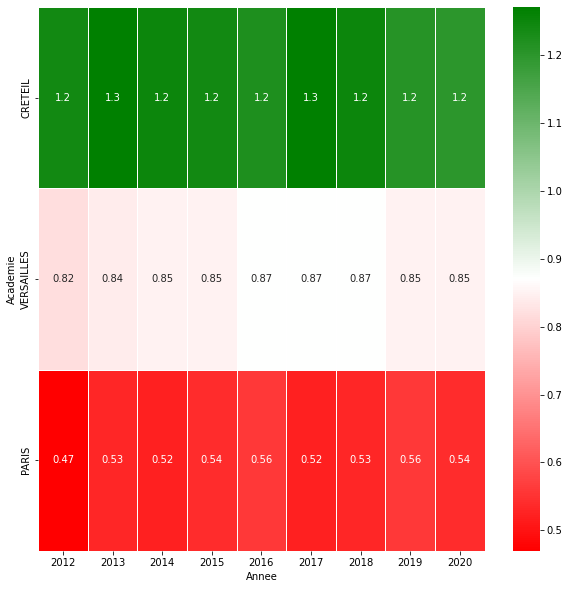

In [60]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(pd.crosstab(df1_bac['Academie'], df1_bac['Annee'], values=df1_bac['Nombre_section_tecnique'],aggfunc='mean').round(2).sort_values(by=[2020], ascending=False), annot=True, cmap=cmap, linewidths=.5, ax=ax)

### 3.2.1 Par commune

<AxesSubplot:xlabel='Annee', ylabel='Ville'>

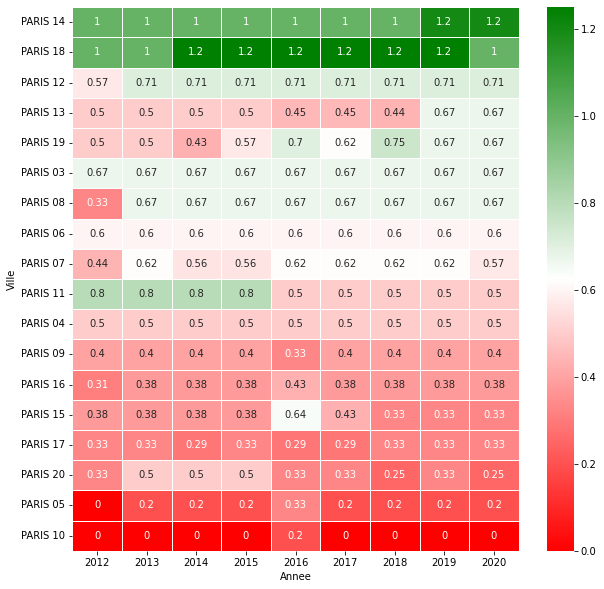

In [61]:
fig, ax = plt.subplots(figsize=(10,10))   
df2_bac=df1_bac[df1_bac['Academie']=='PARIS']
sns.heatmap(pd.crosstab(df2_bac['Ville'], df2_bac['Annee'], values=df2_bac['Nombre_section_tecnique'],aggfunc='mean').round(2).sort_values(by=[2020], ascending=False), annot=True, cmap=cmap, linewidths=.5, ax=ax)

<AxesSubplot:xlabel='Annee', ylabel='Ville'>

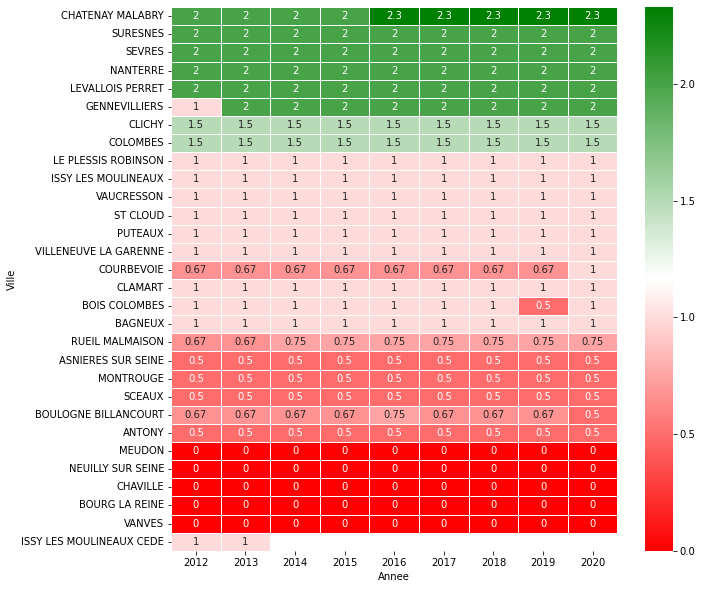

In [62]:
fig, ax = plt.subplots(figsize=(10,10))   
df2_bac=df1_bac[df1_bac['Academie']=='VERSAILLES']
sns.heatmap(pd.crosstab(df2_bac['Ville'], df2_bac['Annee'], values=df2_bac['Nombre_section_tecnique'],aggfunc='mean').round(2).sort_values(by=[2020], ascending=False), annot=True, cmap=cmap, linewidths=.5, ax=ax)

<AxesSubplot:xlabel='Annee', ylabel='Ville'>

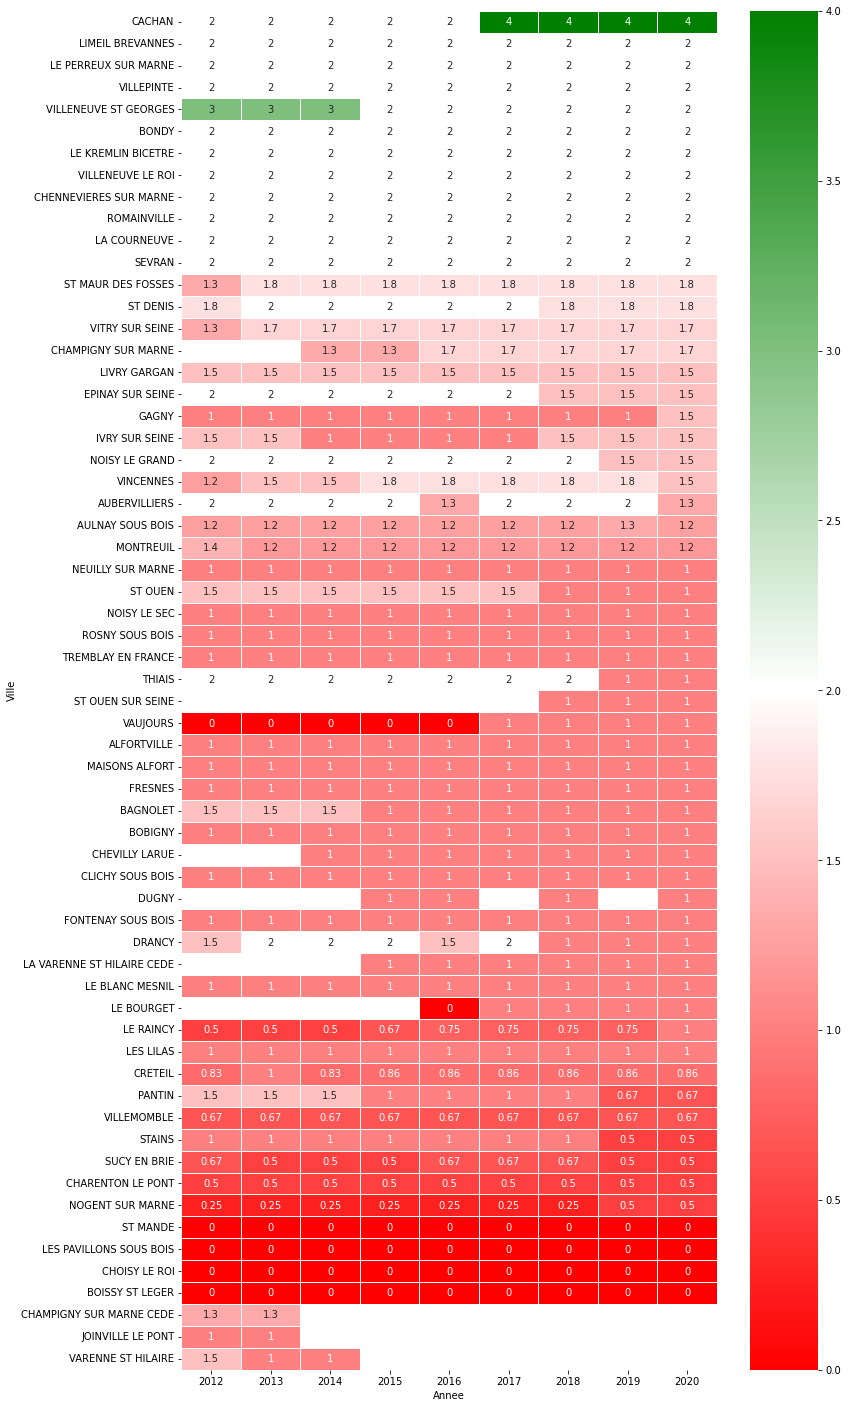

In [63]:
fig, ax = plt.subplots(figsize=(12,25))   
df2_bac=df1_bac[df1_bac['Academie']=='CRETEIL']
sns.heatmap(pd.crosstab(df2_bac['Ville'], df2_bac['Annee'], values=df2_bac['Nombre_section_tecnique'],aggfunc='mean').round(2).sort_values(by=[2020], ascending=False), annot=True, cmap=cmap, linewidths=.5, ax=ax)

Par rapport au nombre de sections techniques, par département et aussi par commune, on observe qu'il existe une correspondance entre les communes défavorisées et le nombre de sections techniques. Dans la littérature, on constate que des inégalités apparaissent parfois dans les choix des étudiants par rapport à leur parcours d'études.

### 3.3.1 Par département

In [64]:
fig = px.line(df1_bac.groupby(['Annee','code_departement'])['Taux_reussite_technique'].mean().reset_index(), x="Annee", y="Taux_reussite_technique", color="code_departement", title='Taux_de_reussite - TECHNIQUE', width=950, height=560)
fig.update_layout(legend =dict(font = dict(family = "Courier", size = 10, color = "black")),
                  legend_title = dict(font = dict(size = 20, color = "blue")))
fig.show()

In [65]:
fig = px.line(df1_bac.groupby(['Annee','code_departement'])['Taux_reussite_general'].mean().reset_index(), x="Annee", y="Taux_reussite_general", color="code_departement", title='Taux_de_reussite - GENERAL', width=950, height=560)
fig.update_layout(legend =dict(font = dict(family = "Courier", size = 10, color = "black")),
                  legend_title = dict(font = dict(size = 20, color = "blue")))
fig.show()

Même s'il y a moins d'étudiants et moins de sections techniques, les départements les plus privilégiés ont toujours un meilleur taux de réussite dans les sections techniques. Et dans la section générale, on observe département 93 avec un taux de reussite tres faible, mais dès 2019, il a commencé à se rapprocher aux autres. En 2020, l'écart entre les différentes était très faible.

### 3.3.2 Par commune

<AxesSubplot:xlabel='Annee', ylabel='Ville'>

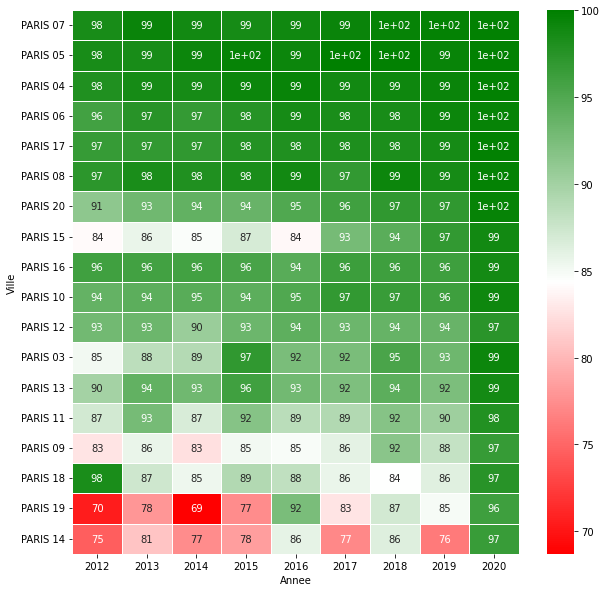

In [66]:
df2_bac=df1_bac[df1_bac['Academie']=='PARIS']
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(pd.crosstab(df2_bac['Ville'], df2_bac['Annee'], values=df1_bac['Taux_reussite_general'],aggfunc='mean').round(2).sort_values(by=[2019], ascending=False), annot=True, cmap=cmap, linewidths=.5, ax=ax)

Si on regarde les taux de resussite general par les arrondissement à Paris et on fait la comparaison avec les resultats du brevet, on retrouve un comportement similaire, on constate aussi une augmentation soutenue, et les arrondissements les taux de réussite les plus élevés sont le 7ème 5ème, 4ème, 8ème, et 17ème. Il est surprenant de voir l'évolution du taux de réussite dans les 14 ème, le 18ème et le 19ème arrondissements, qui ont augmenté de 11% les deux premiers et 21% le dernier, restant au-dessus du taux de réussite de 96%. Cela peut être dû à la difficulté d'évaluation dans la situation sanitaire actuelle et peut-être les critères d'évaluation ont été assouplis.

<AxesSubplot:xlabel='Annee', ylabel='Ville'>

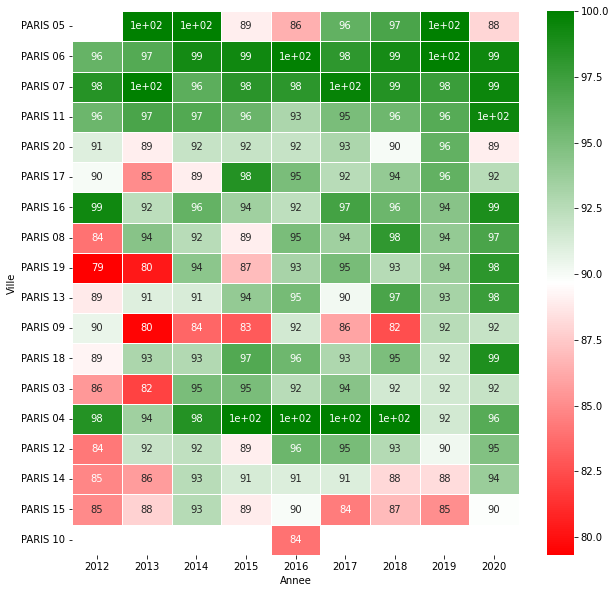

In [67]:
df2_bac=df1_bac[df1_bac['Academie']=='PARIS']
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(pd.crosstab(df2_bac['Ville'], df2_bac['Annee'], values=df1_bac['Taux_reussite_technique'],aggfunc='mean').round(2).sort_values(by=[2019], ascending=False), annot=True, cmap=cmap, linewidths=.5, ax=ax)

## 3.3.1. La variation dans le données socio-economiques entre 2013 et 2018.

In [282]:
idf= pd.read_excel('Ale/Donn/soceco2018.xlsx')

In [283]:
# Le taux de chomage 
# Tous 15-64
idf['TCHOM1564']= 100*idf['P18_CHOM1564'] / idf['P18_ACT1564']

In [284]:
# Part de cadres dans la population active
idf['TCADACTOCC1564'] = 100*idf['C18_ACTOCC1564_CS3'] / idf['C18_ACTOCC1564']

In [285]:
# Le taux d'emploi 
# Tous 15-64
idf['TEMPL1564']= 100*idf['P18_ACTOCC1564'] / idf['P18_POP1564']

In [286]:
# On vien de computer les statistiques pour les autres categories socioprofessionnelles.
# Part d'artisans, commercants et chefs d'entreprise dans la population active
idf['TACCACTOCC1564'] = 100*idf['C18_ACTOCC1564_CS2'] / idf['C18_ACTOCC1564']

In [287]:
# Part de professionnelles intermediares dans la population active occupée.
idf['TINTACTOCC1564'] = 100*idf['C18_ACTOCC1564_CS4'] / idf['C18_ACTOCC1564_CS4']

In [288]:
 # Part d'employés dans la population active occupée.
idf['TEMPLACTOCC1564'] = 100*idf['C18_ACTOCC1564_CS5'] / idf['C18_ACTOCC1564']

In [289]:
# Part d'ouvriers dans la population active occupée.
idf['TOUVRACTOCC1564'] = 100*idf['C18_ACTOCC1564_CS6'] / idf['C18_ACTOCC1564']

In [290]:
idf= idf[['CODGEO','DEP','LIBGEO','TEMPL1564','TCHOM1564','TCADACTOCC1564','TACCACTOCC1564','TINTACTOCC1564','TEMPLACTOCC1564',
         'TOUVRACTOCC1564']]
# On selectionne que les colomnes que on utiliserà 

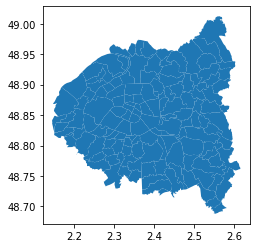

In [291]:
mapp="Ale/Donn/maps.shp"
mappe = gpd.read_file(mapp)
mappe.plot();
# Ca c'est le shape file pour la petite couronne de Paris (Dep: 75,92,93,94)

In [292]:
merged = mappe.set_index('CODGEO').join(idf.set_index('CODGEO'))
merged # Union des données avec la mappe.

index      n_sq_ar  c_ar         l_ar          l_aroff      n_sq_co  \
CODGEO                                                                        
75116       0  750000016.0  16.0  16Ã¨me Ardt            Passy  750001537.0   
75119       1  750000019.0  19.0  19Ã¨me Ardt  Buttes-Chaumont  750001537.0   
75103       2  750000003.0   3.0   3Ã¨me Ardt           Temple  750001537.0   
75111       3  750000011.0  11.0  11Ã¨me Ardt       Popincourt  750001537.0   
75105       4  750000005.0   5.0   5Ã¨me Ardt        PanthÃ©on  750001537.0   
...       ...          ...   ...          ...              ...          ...   
94019   32574          NaN   NaN         None             None          NaN   
94060   32575          NaN   NaN         None             None          NaN   
93057   32627          NaN   NaN         None             None          NaN   
93061   32656          NaN   NaN         None             None          NaN   
93048   32660          NaN   NaN         None             None          NaN   

             surface     perimetre                      nom  \
CODGEO                                                        
75116   1.637254e+07  17416.109657                     None   
75119   6.792651e+06  11253.182479                     None   
75103   1.170883e+06   4519.263648                     None   
75111   3.665442e+06   8282.011886                     None   
75105   2.539375e+06   6239.195396                     None   
...              ...           ...                      ...   
94019            NaN           NaN   Chennevières-sur-Marne   
94060            NaN           NaN         La Queue-en-Brie   
93057            NaN           NaN  Les Pavillons-sous-Bois   
93061            NaN           NaN     Le Pré-Saint-Gervais   
93048            NaN           NaN                Montreuil   

                               wikipedia  ...  \
CODGEO                                    ...   
75116                               None  ...   
75119                               None  ...   
75103                               None  ...   
75111                               None  ...   
75105                               None  ...   
...                                  ...  ...   
94019          fr:Chennevières-sur-Marne  ...   
94060                fr:La Queue-en-Brie  ...   
93057         fr:Les Pavillons-sous-Bois  ...   
93061            fr:Le Pré-Saint-Gervais  ...   
93048   fr:Montreuil (Seine-Saint-Denis)  ...   

                                                 geometry DEP  \
CODGEO                                                          
75116   POLYGON ((2.27427 48.87837, 2.27749 48.87796, ...  75   
75119   POLYGON ((2.38943 48.90122, 2.39014 48.90108, ...  75   
75103   POLYGON ((2.36383 48.86750, 2.36389 48.86747, ...  75   
75111   POLYGON ((2.39624 48.85415, 2.39708 48.85308, ...  75   
75105   POLYGON ((2.36443 48.84614, 2.36484 48.84584, ...  75   
...                                                   ...  ..   
94019   POLYGON ((2.51681 48.78641, 2.51765 48.78662, ...  94   
94060   POLYGON ((2.55528 48.79204, 2.57154 48.79891, ...  94   
93057   POLYGON ((2.49018 48.90728, 2.49193 48.90755, ...  93   
93061   POLYGON ((2.39891 48.88956, 2.39895 48.88956, ...  93   
93048   POLYGON ((2.41528 48.85518, 2.41680 48.85588, ...  93   

                          LIBGEO  TEMPL1564  TCHOM1564  TCADACTOCC1564  \
CODGEO                                                                   
75116   Paris 16e Arrondissement  66.528314   9.535463       51.159271   
75119   Paris 19e Arrondissement  64.583459  15.946173       37.791645   
75103    Paris 3e Arrondissement  74.052105   9.963184       52.602729   
75111   Paris 11e Arrondissement  73.673829  11.098717       51.729993   
75105    Paris 5e Arrondissement  65.001268   9.145329       57.438181   
...                          ...        ...        ...             ...   
94019     Chennevières-sur-Marne  65.728780  13.711063       18.461055   
94060     

In [293]:
regions = merged.dissolve(by='DEP')
regions # Les departements sont neccessaires pour avoir les contours.

geometry index      n_sq_ar  \
DEP                                                                         
75   POLYGON ((2.34308 48.81609, 2.34171 48.81634, ...     0  750000016.0   
92   POLYGON ((2.27597 48.75668, 2.27590 48.75670, ...   322          NaN   
93   POLYGON ((2.56066 48.88458, 2.56050 48.88440, ...    26          NaN   
94   POLYGON ((2.54231 48.69981, 2.54219 48.69989, ...   311          NaN   

     c_ar         l_ar l_aroff      n_sq_co       surface     perimetre  \
DEP                                                                       
75   16.0  16Ã¨me Ardt   Passy  750001537.0  1.637254e+07  17416.109657   
92    NaN         None    None          NaN           NaN           NaN   
93    NaN         None    None          NaN           NaN           NaN   
94    NaN         None    None          NaN           NaN           NaN   

              nom        wikipedia  surf_ha                    LIBGEO  \
DEP                                                                     
75           None             None      NaN  Paris 16e Arrondissement   
92         Antony        fr:Antony    955.0                    Antony   
93   Noisy-le-Sec  fr:Noisy-le-Sec    504.0              Noisy-le-Sec   
94   Sucy-en-Brie  fr:Sucy-en-Brie   1041.0              Sucy-en-Brie   

     TEMPL1564  TCHOM1564  TCADACTOCC1564  TACCACTOCC1564  TINTACTOCC1564  \
DEP                                                                         
75   66.528314   9.535463       51.159271        9.558413           100.0   
92   71.321293   8.782513       48.471890        3.979032           100.0   
93   59.287998  17.678893       14.208325        5.348661           100.0   
94   67.234342   9.927839       29.663797        5.770038           100.0   

     TEMPLACTOCC1564  TOUVRACTOCC1564  
DEP                                    
75         16.952799         4.306666  
92         17.292776         6.397908  
93         36.724473        20.315324  
94         24.725220        12.282545

In [294]:
merged['TLOWC1564'] = merged['TEMPLACTOCC1564'] + merged['TOUVRACTOCC1564'] 

### 3.3.2 Pour l'année 2013

In [295]:
petite13= pd.read_excel('Ale/Donn/soceco2013.xlsx')

Une fois telechargées les données pour l'année 2013 on compute les memes statistiques qu'on avait pour l'année 2018 pour ensuite faire une comparaison et voir l'evolution dans ce period de 5 ans. 

In [296]:
petite13['TCHOM1564']= 100*petite13['P13_CHOM1564'] / petite13['P13_ACT1564']

In [297]:
petite13['TCADACTOCC1564'] = 100*petite13['C13_ACTOCC1564_CS3'] / petite13['C13_ACTOCC1564']

In [298]:
petite13['TEMPL1564']= 100*petite13['P13_ACTOCC1564'] / petite13['P13_POP1564']

In [299]:
petite13['TACCACTOCC1564'] = 100*petite13['C13_ACTOCC1564_CS2'] / petite13['C13_ACTOCC1564']

In [300]:
petite13['TINTACTOCC1564'] = 100*petite13['C13_ACTOCC1564_CS4'] / petite13['C13_ACTOCC1564']

In [301]:
petite13['TEMPLACTOCC1564'] = 100*petite13['C13_ACTOCC1564_CS5'] / petite13['C13_ACTOCC1564']

In [302]:
petite13['TOUVRACTOCC1564'] = 100*petite13['C13_ACTOCC1564_CS6'] / petite13['C13_ACTOCC1564']

In [303]:
petite13= petite13[['CODGEO','DEP','LIBGEO','TEMPL1564','TCHOM1564','TCADACTOCC1564','TACCACTOCC1564','TINTACTOCC1564','TEMPLACTOCC1564',
         'TOUVRACTOCC1564']]

In [304]:
diff = pd.merge(merged, petite13, on="CODGEO", suffixes=["", "_13"])
# On fait le merge des données pour les deux années avec le suffixe _13 pour distinguer les données relatives à l'année 2013.

### 3.3.3 Les differences.

In [150]:
diff['DCHOM1564']= diff['TCHOM1564'] - diff['TCHOM1564_13']

In [151]:
diff['DCHOM1564'].mean()

-0.13425450391827104

In [152]:
diff['DEMPL1564']= diff['TEMPL1564'] - diff['TEMPL1564_13']

In [153]:
diff['DCADACTOCC1564']= diff['TCADACTOCC1564'] - diff['TCADACTOCC1564_13']

In [154]:
diff['TLOWC1564_13'] = diff['TEMPLACTOCC1564_13'] + diff['TOUVRACTOCC1564_13'] 
diff['DLOWC1564']= diff['TLOWC1564'] - diff['TLOWC1564_13']

### Les cartes.
#### Le chomage.

In [155]:
print(diff['DCHOM1564'].min() ,diff['DCHOM1564'].max())

-4.3076607418803725 3.8723161646246744


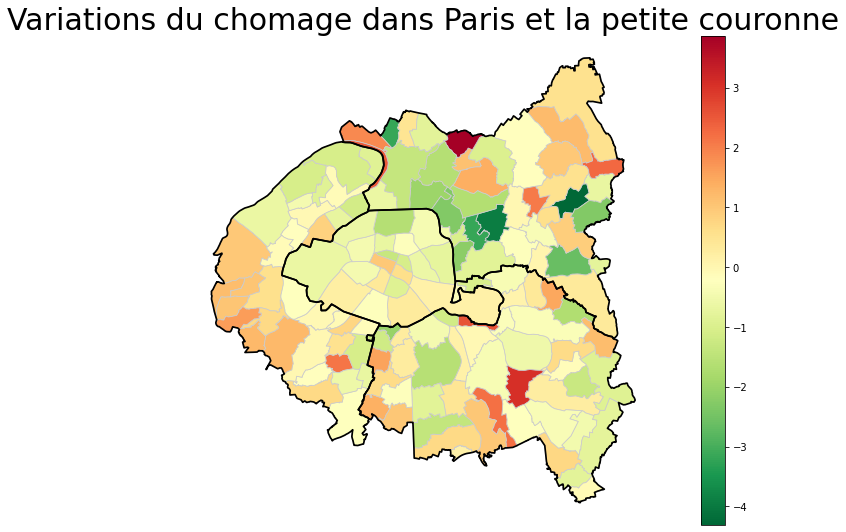

<Figure size 1152x648 with 0 Axes>

In [156]:
variable = 'DCHOM1564'
vmin, vmax = -4.307660741880383, 3.8723161646246744
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
diff.plot(column=variable, cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Variations du chomage dans Paris et la petite couronne", fontsize=30)
plt.show();
# En général le taux de chomage a baissé un peu partout avec quelques exceptions à nord-est et sud-ouest e la petite couronne.

#### Pour le variations du taux d'emploi

In [157]:
print(diff['DEMPL1564'].min() ,diff['DEMPL1564'].max())

-5.384820734847764 3.832114628265302


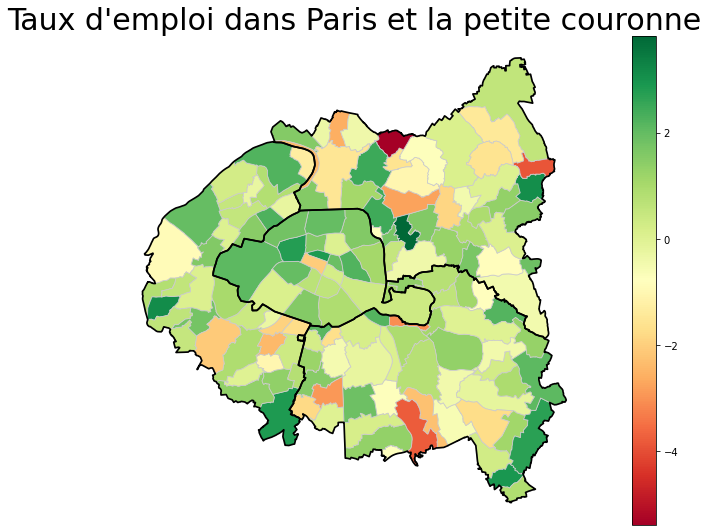

<Figure size 1152x648 with 0 Axes>

In [158]:
variable = 'DEMPL1564'
vmin, vmax = -5.384820734847764, 3.832114628265302
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
diff.plot(column=variable, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Taux d'emploi dans Paris et la petite couronne", fontsize=30)
plt.show();
# Le vert dans ce cas est plus diffuse, donc on peut dire que en général le taux d'emploi a augmenté presque partout. 

#### Pour le taux de cadres. 

In [159]:
print(diff['DCADACTOCC1564'].min() ,diff['DCADACTOCC1564'].max())

-7.286329872764281 7.879031168948803


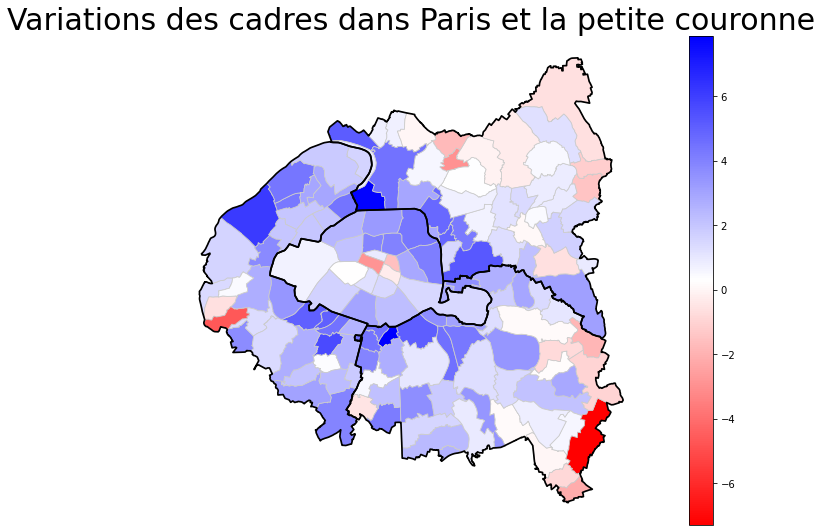

<Figure size 1152x648 with 0 Axes>

In [160]:
variable = 'DCADACTOCC1564'
vmin, vmax = -7.28632987276427, 7.879031168948803
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='bwr_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
diff.plot(column=variable, cmap='bwr_r', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Variations des cadres dans Paris et la petite couronne", fontsize=30)
plt.show();

Les cadres sont augmentées presque partout, il peut y avoir plusieurs explications, une explication peut etre liée au fait que les ouvriers et eployeées ont quittés la petite couronne pour la grande couronne ou peut etre que il y a plus de postes comme cadre dans la petite couronne en 2018 que avant en 2013.

#### Pour les ouvriers et employés


In [161]:
print(diff['DLOWC1564'].min() ,diff['DLOWC1564'].max())

-8.099657496229128 7.003354567955029


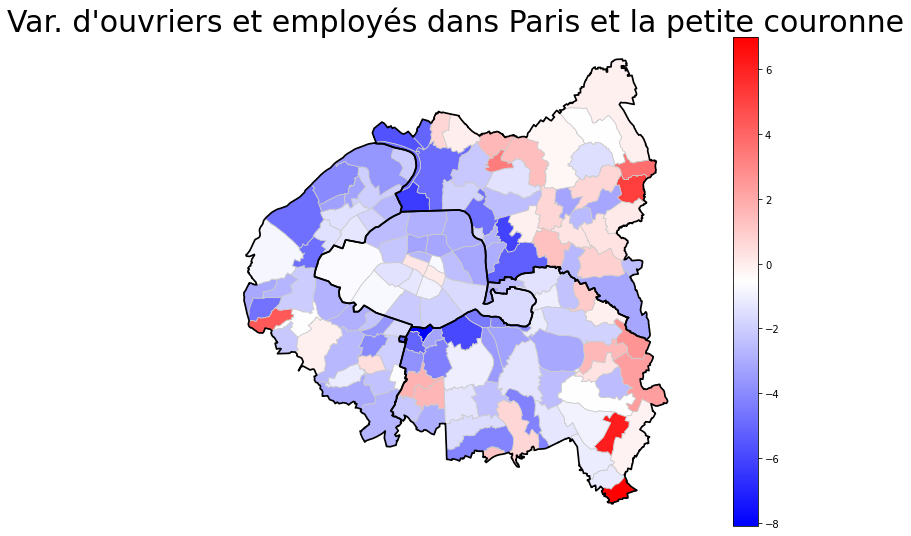

<Figure size 1152x648 with 0 Axes>

In [162]:
variable = 'DLOWC1564'
vmin, vmax = -8.099657496229142, 7.003354567955018
# Create colorbar as a legend
fig, ax = plt.subplots(1, figsize=(16, 9))
sm = plt.cm.ScalarMappable(cmap='bwr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.figure(figsize=(16,9))
diff.plot(column=variable, cmap='bwr', linewidth=0.8, ax=ax, edgecolor='0.8')
regions.plot(color='None', edgecolor='black', linewidth=1.7, ax=ax)
ax.axis('off')
ax.set_title("Var. d'ouvriers et employés dans Paris et la petite couronne", fontsize=30)
plt.show();

Dans ce cas le graphique est l'opposé du graphique pour les cadres.

# 4. CONCLUSION

In [390]:
df3_brevet=df1_brevet[df1_brevet['session'].isin([2013, 2018])]
df4_brevet=pd.DataFrame(df3_brevet.groupby(by=['session','departement', 'departement_libelle','commune_et_arrondissement', 'commune_et_arrondissement_lib_l'  ], dropna=False).mean().reset_index().round(2))

In [391]:
df3_bac=df1_bac[df1_bac['Annee'].isin([2013, 2018])]
df4_bac=pd.DataFrame(df3_bac.groupby(by=['Annee', 'Code commune','Code region' ], dropna=False).mean().reset_index().round(2))
df4_bac=df4_bac[['Annee', 'Code commune', 'Code region', 'Taux_mentions_technique','Taux_mentions_general', 'total_eleves_technique', 'Nombre_section_tecnique',
       'Taux_reussite_general', 'Taux_reussite_technique', ]]

In [392]:
CSP_18=merged
CSP_18['CODGEO']=CSP_18.index
CSP_18['Annee']=2018
CSP_13=petite13
CSP_13['Annee']=2013
CSP=CSP_18.append(CSP_13).reset_index()
CSP=CSP[['CODGEO','Annee','DEP', 'LIBGEO','TEMPL1564', 'TCHOM1564', 'TCADACTOCC1564', 'TACCACTOCC1564','TINTACTOCC1564', 'TEMPLACTOCC1564', 'TOUVRACTOCC1564', 'TLOWC1564']]

In [393]:
df_group= pd.merge(df4_brevet.add_prefix('Brev_'), df4_bac.add_prefix('BAC_'), how='outer', left_on=['Brev_session', 'Brev_commune_et_arrondissement'], right_on=['BAC_Annee', 'BAC_Code commune']).drop(['BAC_Annee', 'BAC_Code commune', 'BAC_Code region'], axis=1)

In [394]:
df_group['Brev_commune_et_arrondissement']=df_group['Brev_commune_et_arrondissement'].astype(int)
df_group= pd.merge(df_group, CSP, how='outer', left_on=['Brev_session', 'Brev_commune_et_arrondissement'], right_on=['Annee', 'CODGEO'])
df_group=df_group[['CODGEO', 'Annee', 'DEP', 'LIBGEO','Brev_nombre_d_inscrits',
       'Brev_nombre_de_presents', 'Brev_nombre_total_d_admis',
       'Brev_nombre_d_admis_sans_mention', 'Brev_nombre_d_admis_mention_ab',
       'Brev_nombre_d_admis_mention_b', 'Brev_nombre_d_admis_mention_tb',
       'Brev_taux_de_reussite', 'BAC_Taux_mentions_technique',
       'BAC_Taux_mentions_general', 'BAC_total_eleves_technique',
       'BAC_Nombre_section_tecnique', 'BAC_Taux_reussite_general',
       'BAC_Taux_reussite_technique',
       'TEMPL1564', 'TCHOM1564', 'TCADACTOCC1564', 'TACCACTOCC1564',
       'TINTACTOCC1564', 'TEMPLACTOCC1564', 'TOUVRACTOCC1564', 'TLOWC1564']]